# Building a Decision Tree Classifier

# Loading the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset

In [2]:
schools=pd.read_csv("School_Admissions.csv")
schools.head()

,SNo,Name,Type,Accomodation,Academic_Reputation,Co-Curricular_Education,Individual_Attention_to_Students,Parental_Involvement,Value_for_Money,Admission
0,1,Rishi Valley School,Co-ed,Boarding,95,95,92,79,91,Yes
1,2,Heritage Xperiential Learning School,Co-ed,Day,93,95,89,85,73,No
2,3,The Valley School,Co-ed,Day,92,93,93,87,76,Yes
3,4,The Doon School,Boys,Boarding,86,96,89,82,87,Yes
4,5,Mayo College Girls School,Girls,Boarding,90,91,86,85,83,Yes


# Work with the X Predictor Variables

In [3]:
Xvar=list(schools.columns)
Xvar.remove('Admission')
Xvar

['SNo',
 'Name',
 'Type',
 'Accomodation',
 'Academic_Reputation',
 'Co-Curricular_Education',
 'Individual_Attention_to_Students',
 'Parental_Involvement',
 'Value_for_Money']

# Encoding the Categorical Variables

In [4]:
encode_schools=pd.get_dummies(schools[Xvar])
encode_schools.head()

,SNo,Academic_Reputation,Co-Curricular_Education,Individual_Attention_to_Students,Parental_Involvement,Value_for_Money,Name_Birla Vidya Mandir,Name_Campion School,Name_Heritage Xperiential Learning School,Name_La Martiniere Girls College,...,Name_Unison World School,Name_Vidhashilp Academy,Name_Welham Boys School,Name_Welham Girls School,Name_Wynberg Allen,Type_Boys,Type_Co-ed,Type_Girls,Accomodation_Boarding,Accomodation_Day
0,1,95,95,92,79,91,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,2,93,95,89,85,73,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,3,92,93,93,87,76,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,86,96,89,82,87,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,5,90,91,86,85,83,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


# Setting X and Y

In [5]:
X=encode_schools
Y=schools.Admission.map(lambda x: int(x=='Yes'))
print(Y)

0     1
1     0
2     1
3     1
4     1
5     1
6     1
7     0
8     1
9     0
10    1
11    1
12    0
13    1
14    1
15    0
16    0
17    0
18    0
19    1
Name: Admission, dtype: int64


# Splitting the Dataset

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

# Building the Decision Tree Classifier

In [7]:
from sklearn.tree import DecisionTreeClassifier
schools_tree=DecisionTreeClassifier(criterion='gini',max_depth=3).fit(X_train, Y_train)

In [8]:
schools_tree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Accuracy Score

In [9]:
schools_tree.score(X_test,Y_test)

0.8333333333333334

# Visualising the Tree

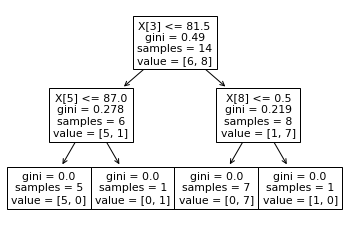

In [10]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(schools_tree);